### Loading the Images

In [1]:
import os
import shutil

In [2]:
original_dataset_dir="C:\\Users\\Majid\\Desktop\\images\\im_cat_dog"

In [3]:
base_dir="C:\\Users\\Majid\\Desktop\\cats_and_dogs_small"
os.mkdir(base_dir)

In [4]:
train_dir=os.path.join(base_dir, "train")
os.mkdir(train_dir)

validation_dir=os.path.join(base_dir, "valid")
os.mkdir(validation_dir)

test_dir=os.path.join(base_dir, "test")
os.mkdir(test_dir)

In [5]:
train_cats_dir=os.path.join(train_dir, "train_cat")
os.mkdir(train_cats_dir)

train_dogs_dir=os.path.join(train_dir, "train_dog")
os.mkdir(train_dogs_dir)

In [6]:
validation_cats_dir=os.path.join(validation_dir, "valid_cat")
os.mkdir(validation_cats_dir)

validation_dogs_dir=os.path.join(validation_dir, "valid_dog")
os.mkdir(validation_dogs_dir)

In [7]:
test_cats_dir=os.path.join(test_dir, "test_cat")
os.mkdir(test_cats_dir)

test_dogs_dir=os.path.join(test_dir, "test_dog")
os.mkdir(test_dogs_dir)

In [8]:
fnames1=["cat.{}.jpg".format(i) for i in range(1000)]
for fname in fnames1:
    src=os.path.join(original_dataset_dir, fname)
    dst=os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames2=["cat.{}.jpg".format(i) for i in range(1000, 1500)]
for fname in fnames2:
    src=os.path.join(original_dataset_dir, fname)
    dst=os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames3=["cat.{}.jpg".format(i) for i in range(1500, 2000)]
for fname in fnames3:
    src=os.path.join(original_dataset_dir, fname)
    dst=os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)


In [9]:
fnames4=["dog.{}.jpg".format(i) for i in range(1000)]
for fname in fnames4:
    src=os.path.join(original_dataset_dir, fname)
    dst=os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames5=["dog.{}.jpg".format(i) for i in range(1000, 1500)]
for fname in fnames5:
    src=os.path.join(original_dataset_dir, fname)
    dst=os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames6=["dog.{}.jpg".format(i) for i in range(1500, 2000)]
for fname in fnames6:
    src=os.path.join(original_dataset_dir, fname)
    dst=os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [10]:
print("total training cat images=", len(os.listdir(train_cats_dir)))

print("total testing cat images=", len(os.listdir(test_cats_dir)))

print("total validation cat images=", len(os.listdir(validation_cats_dir)))

print("total training dog images=", len(os.listdir(train_dogs_dir)))

print("total testing dog images=", len(os.listdir(test_cats_dir)))

print("total validation dog images=", len(os.listdir(validation_cats_dir)))

total training cat images= 1000
total testing cat images= 500
total validation cat images= 500
total training dog images= 1000
total testing dog images= 500
total validation dog images= 500


## Conventional Neural networks

In [11]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [12]:
model=models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [14]:
from tensorflow.keras import optimizers

In [15]:
model.compile(optimizer=optimizers.RMSprop(lr=1e-4), loss="binary_crossentropy", metrics=["acc"])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
train_datagen=ImageDataGenerator(rescale=1/255)
test_datagen=ImageDataGenerator(rescale=1/255)

In [18]:
train_generator=train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=20, class_mode="binary")
valiadtion_generator=test_datagen.flow_from_directory(validation_dir, target_size=(150,150), batch_size=20, class_mode="binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [22]:
history=model.fit_generator(train_generator, steps_per_epoch=100, validation_data=valiadtion_generator, epochs=30, validation_steps=50)

Epoch 1/30
100/100 [==============================] - 94s 939ms/step - loss: 0.6889 - acc: 0.5415 - val_loss: 0.6697 - val_acc: 0.6030
Epoch 2/30
100/100 [==============================] - 92s 919ms/step - loss: 0.6509 - acc: 0.6185 - val_loss: 0.6566 - val_acc: 0.5990
Epoch 3/30
100/100 [==============================] - 91s 912ms/step - loss: 0.6040 - acc: 0.6775 - val_loss: 0.6114 - val_acc: 0.6530
Epoch 4/30
100/100 [==============================] - 91s 907ms/step - loss: 0.5726 - acc: 0.6980 - val_loss: 0.6009 - val_acc: 0.6630
Epoch 5/30
100/100 [==============================] - 92s 917ms/step - loss: 0.5473 - acc: 0.7220 - val_loss: 0.5941 - val_acc: 0.6690
Epoch 6/30
100/100 [==============================] - 90s 899ms/step - loss: 0.5156 - acc: 0.7440 - val_loss: 0.5714 - val_acc: 0.6870
Epoch 7/30
100/100 [==============================] - 91s 913ms/step - loss: 0.4937 - acc: 0.7605 - val_loss: 0.5828 - val_acc: 0.6830
Epoch 8/30
100/100 [==============================] - 9

In [33]:
model.save("cats_and_dogs_small_1.h5")

In [25]:
import matplotlib.pyplot as plt

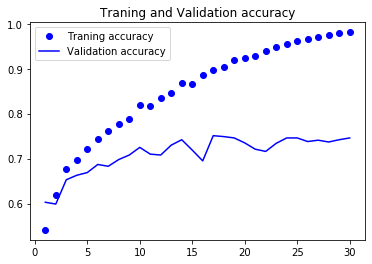

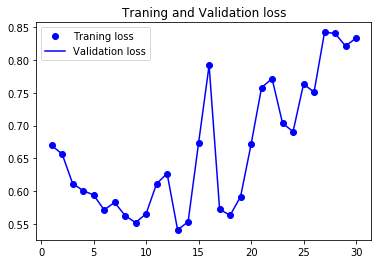

In [24]:
acc=history.history["acc"]
val_acc=history.history["val_acc"]

loss=history.history["loss"]
val_loss=loss=history.history["val_loss"]

epochs=range(1, len(acc)+1)

plt.plot(epochs, acc, "bo", label="Traning accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Traning and Validation accuracy")
plt.legend()

plt.figure()
plt.plot(epochs, loss, "bo", label="Traning loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Traning and Validation loss")
plt.legend()
plt.show()

## Data Augmentation

In [19]:
datagen=ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, 
                           shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode="nearest")

In [20]:
from tensorflow.keras.preprocessing import image
fnames=[os.path.join(test_cats_dir, fname) for fname in os.listdir(test_cats_dir)]

In [21]:
im_path=fnames[3]

In [22]:
img=image.load_img(im_path, target_size=(150,150))

In [23]:
x=image.img_to_array(img)
x=x.reshape((1,)+x.shape)

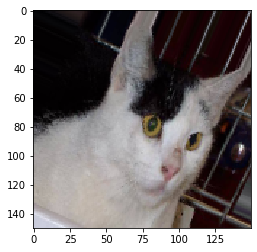

In [26]:
i=0
for batch in datagen.flow(x, batch_size=1):
    imgplot=plt.imshow(image.array_to_img(batch[0]))
    i+=1
    if i % 4==0:
        break
plt.show()

In [27]:
model=models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

In [28]:
model.compile(optimizer=optimizers.RMSprop(lr=1e-4), loss="binary_crossentropy", metrics=["acc"])

In [29]:
train_datagen=ImageDataGenerator(rescale=1/255,rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, 
                           shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode="nearest")

In [30]:
test_datagen=ImageDataGenerator(rescale=1/255)

In [31]:
train_generator=train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=20, class_mode="binary")

validation_generator=test_datagen.flow_from_directory(test_dir, target_size=(150,150), batch_size=20, class_mode="binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [36]:
history=model.fit_generator(train_generator, steps_per_epoch=100, validation_data=valiadtion_generator, epochs=100, validation_steps=50)

Epoch 1/100
100/100 [==============================] - 42s 424ms/step - loss: 0.6938 - acc: 0.5130 - val_loss: 0.6874 - val_acc: 0.5000
Epoch 2/100
100/100 [==============================] - 41s 413ms/step - loss: 0.6824 - acc: 0.5470 - val_loss: 0.6901 - val_acc: 0.5160
Epoch 3/100
100/100 [==============================] - 43s 430ms/step - loss: 0.6695 - acc: 0.5745 - val_loss: 0.6459 - val_acc: 0.6060
Epoch 4/100
100/100 [==============================] - 41s 408ms/step - loss: 0.6578 - acc: 0.6000 - val_loss: 0.6384 - val_acc: 0.6270
Epoch 5/100
100/100 [==============================] - 41s 407ms/step - loss: 0.6458 - acc: 0.6115 - val_loss: 0.6451 - val_acc: 0.6000
Epoch 6/100
100/100 [==============================] - 40s 403ms/step - loss: 0.6416 - acc: 0.6335 - val_loss: 0.6079 - val_acc: 0.6720
Epoch 7/100
100/100 [==============================] - 42s 421ms/step - loss: 0.6170 - acc: 0.6450 - val_loss: 0.5865 - val_acc: 0.6870
Epoch 8/100
100/100 [===========================

Epoch 37/100
100/100 [==============================] - 45s 454ms/step - loss: 0.5032 - acc: 0.7450 - val_loss: 0.4904 - val_acc: 0.7650
Epoch 38/100
100/100 [==============================] - 43s 431ms/step - loss: 0.4924 - acc: 0.7555 - val_loss: 0.4809 - val_acc: 0.7700
Epoch 39/100
100/100 [==============================] - 42s 419ms/step - loss: 0.4926 - acc: 0.7515 - val_loss: 0.4766 - val_acc: 0.7660
Epoch 40/100
100/100 [==============================] - 40s 400ms/step - loss: 0.4853 - acc: 0.7660 - val_loss: 0.4815 - val_acc: 0.7700
Epoch 41/100
100/100 [==============================] - 41s 407ms/step - loss: 0.4894 - acc: 0.7735 - val_loss: 0.4748 - val_acc: 0.7770
Epoch 42/100
100/100 [==============================] - 40s 402ms/step - loss: 0.4831 - acc: 0.7645 - val_loss: 0.4999 - val_acc: 0.7640 0.76
Epoch 43/100
100/100 [==============================] - 42s 422ms/step - loss: 0.4788 - acc: 0.7660 - val_loss: 0.5731 - val_acc: 0.7270
Epoch 44/100
100/100 [==============

Epoch 73/100
100/100 [==============================] - 42s 420ms/step - loss: 0.4295 - acc: 0.8010 - val_loss: 0.5637 - val_acc: 0.7600
Epoch 74/100
100/100 [==============================] - 41s 410ms/step - loss: 0.4292 - acc: 0.7945 - val_loss: 0.4298 - val_acc: 0.7960
Epoch 75/100
100/100 [==============================] - 41s 412ms/step - loss: 0.4211 - acc: 0.8060 - val_loss: 0.4552 - val_acc: 0.7890
Epoch 76/100
100/100 [==============================] - 43s 432ms/step - loss: 0.4214 - acc: 0.8010 - val_loss: 0.4853 - val_acc: 0.7880
Epoch 77/100
100/100 [==============================] - 41s 414ms/step - loss: 0.4196 - acc: 0.8025 - val_loss: 0.5513 - val_acc: 0.7770
Epoch 78/100
100/100 [==============================] - 42s 417ms/step - loss: 0.4173 - acc: 0.8035 - val_loss: 0.4344 - val_acc: 0.8100
Epoch 79/100
100/100 [==============================] - 42s 424ms/step - loss: 0.4189 - acc: 0.8075 - val_loss: 0.4402 - val_acc: 0.7890
Epoch 80/100
100/100 [===================

In [55]:
model.save("cats_and_dogs_small_2.h5")

## Transfer Learning

In [32]:
from tensorflow.keras.applications import VGG16

In [33]:
conv_base=VGG16(weights="imagenet",include_top=False, input_shape=(150,150,3))

In [34]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [35]:
import numpy as np

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [37]:
base_dir="C:\\Users\\Majid\\Desktop\cats_and_dogs_small"

In [38]:
train_dir=os.path.join(base_dir, "train")
validation_dir=os.path.join(base_dir, "valid")
test_dir=os.path.join(base_dir, "test")

In [39]:
datagen=ImageDataGenerator(rescale=1/255, )
batch_size=20

def extract_features(directory, sample_count):
    features=np.zeros(shape=(sample_count, 4, 4, 512))
    labels=np.zeros(shape=(sample_count))
    generator=datagen.flow_from_directory(directory, batch_size=batch_size, target_size=(150,150), class_mode="binary")
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch=conv_base.predict(inputs_batch)
        features[i*batch_size:(i+1)*batch_size]=features_batch
        labels[i*batch_size:(i+1)*batch_size]=labels_batch
        i+=1
        if i*batch_size>=sample_count:
            break
    return features, labels

In [40]:
train_features, train_labels=extract_features(train_dir, 2000)

Found 2000 images belonging to 2 classes.


In [41]:
validation_features, validation_labels=extract_features(validation_dir, 1000)
test_features, test_labels=extract_features(test_dir, 1000)

Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [42]:
train_features=np.reshape(train_features, (2000, 4* 4*512))
test_features=np.reshape(test_features, (1000, 4*4*512))
validation_features=np.reshape(validation_features, (1000, 4*4*512))

In [43]:
from tensorflow.keras import models, layers, optimizers

In [44]:
model=models.Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(256, activation="relu", input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation="sigmoid"))

In [45]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss="binary_crossentropy", metrics=["acc"])

In [51]:
history=model.fit(train_features,train_labels,validation_data=(validation_features, validation_labels), epochs=30, batch_size=20)

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 3s 1ms/sample - loss: 0.5831 - acc: 0.6850 - val_loss: 0.4336 - val_acc: 0.8410
Epoch 2/30
2000/2000 [==============================] - 3s 1ms/sample - loss: 0.4247 - acc: 0.8060 - val_loss: 0.3566 - val_acc: 0.8580
Epoch 3/30
2000/2000 [==============================] - 2s 1ms/sample - loss: 0.3507 - acc: 0.8470 - val_loss: 0.3159 - val_acc: 0.8820
Epoch 4/30
2000/2000 [==============================] - 2s 1ms/sample - loss: 0.3098 - acc: 0.8740 - val_loss: 0.2932 - val_acc: 0.8890
Epoch 5/30
2000/2000 [==============================] - 2s 1ms/sample - loss: 0.2932 - acc: 0.8750 - val_loss: 0.2795 - val_acc: 0.8950
Epoch 6/30
2000/2000 [==============================] - 2s 1ms/sample - loss: 0.2604 - acc: 0.9025 - val_loss: 0.2703 - val_acc: 0.8950
Epoch 7/30
2000/2000 [==============================] - 2s 1ms/sample - loss: 0.2447 - acc: 0.9095 - val_loss: 0.2584 - val_acc: 0.8980


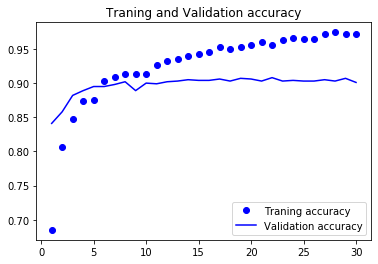

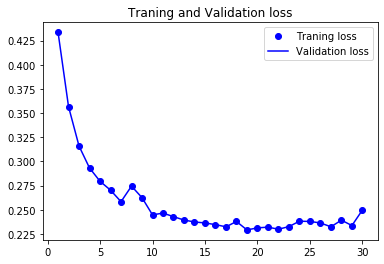

In [52]:
import matplotlib.pyplot as plt
acc=history.history["acc"]
val_acc=history.history["val_acc"]

loss=history.history["loss"]
val_loss=loss=history.history["val_loss"]

epochs=range(1, len(acc)+1)

plt.plot(epochs, acc, "bo", label="Traning accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Traning and Validation accuracy")
plt.legend()

plt.figure()
plt.plot(epochs, loss, "bo", label="Traning loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Traning and Validation loss")
plt.legend()
plt.show()